Summary Statistics:
Mean Aggregation: Total Funds: 18000000000.0, Max Funds: 37188564.99534184, Min Funds: 22540178.601799108
Median Aggregation: Total Funds: 17955782063.068535, Max Funds: 37097209.349700965, Min Funds: 22484807.47980809
Quadratic Aggregation: Total Funds: 30000000.0, Max Funds: 76311.20861662888, Min Funds: 28033.94370870544


/Users/idrees/Code/govxs/agents/VoterAgent.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


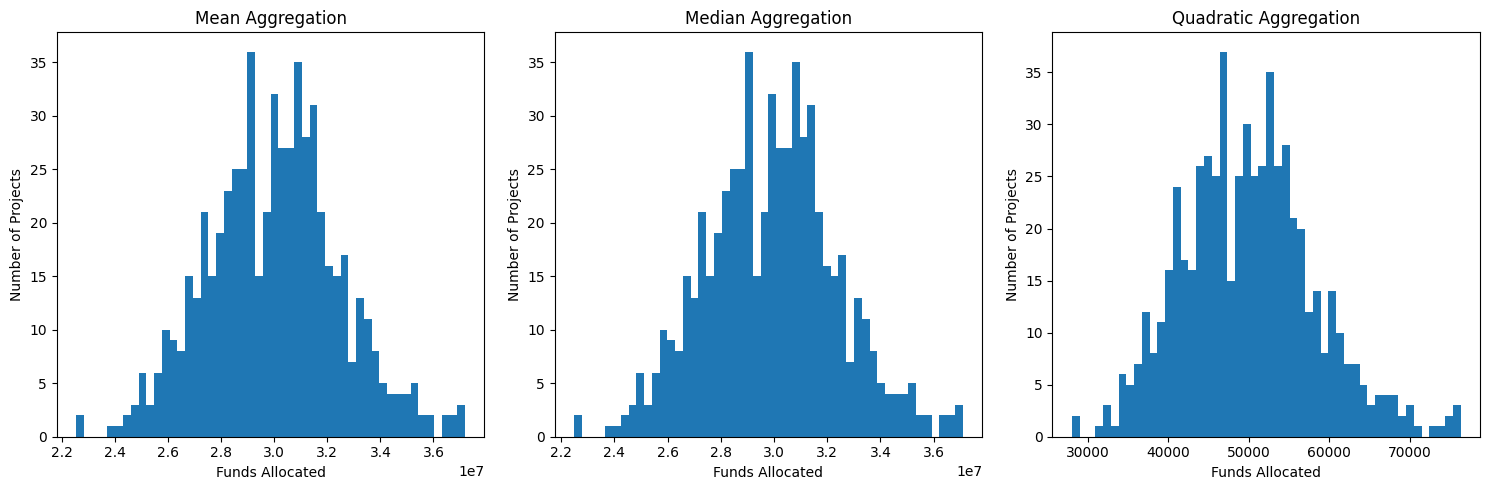

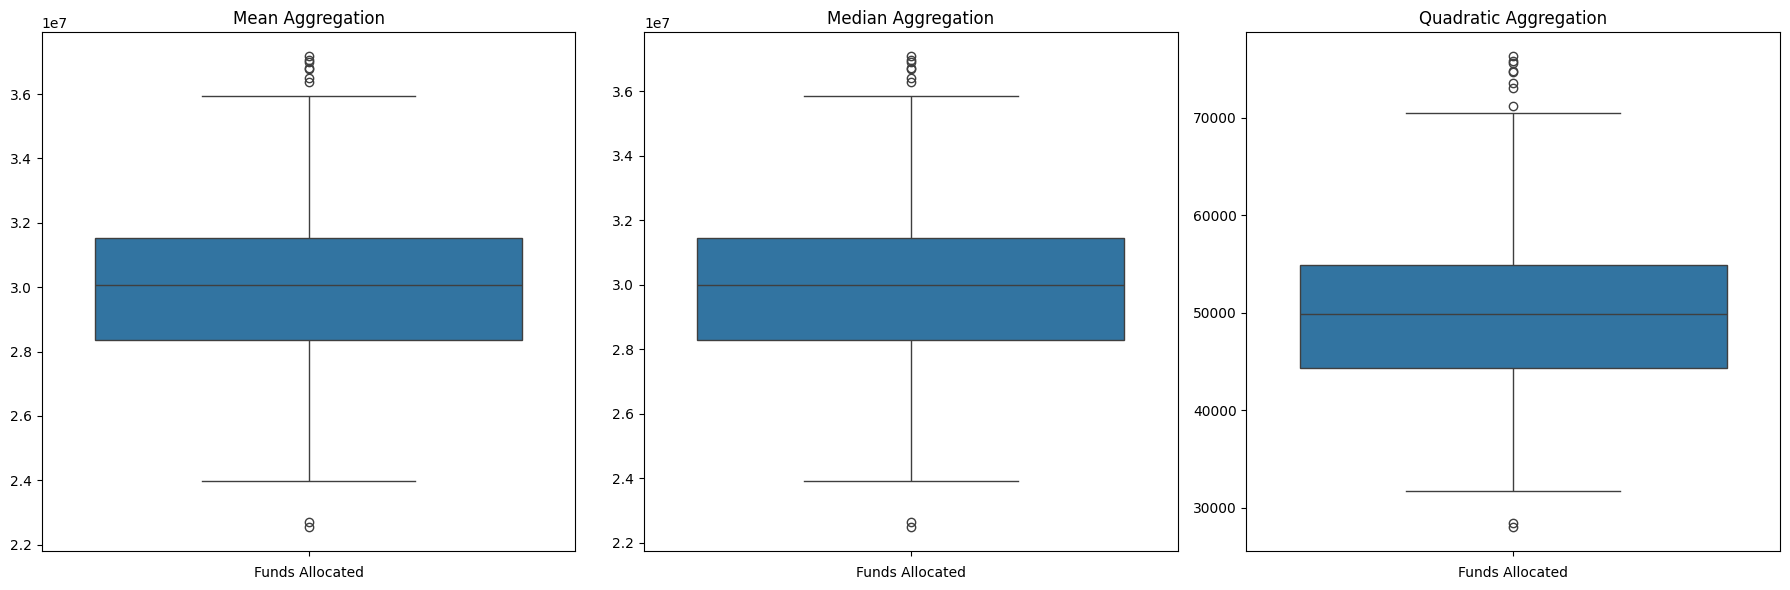

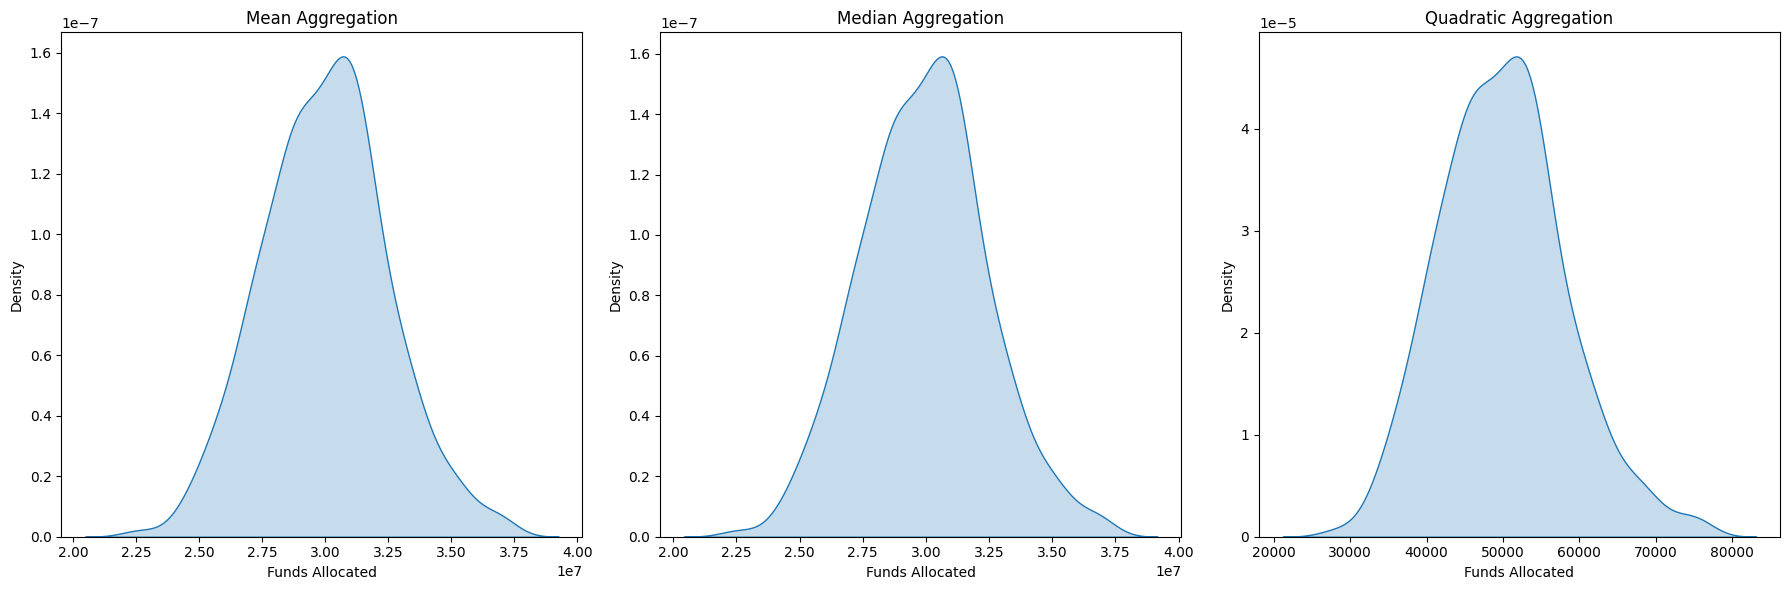

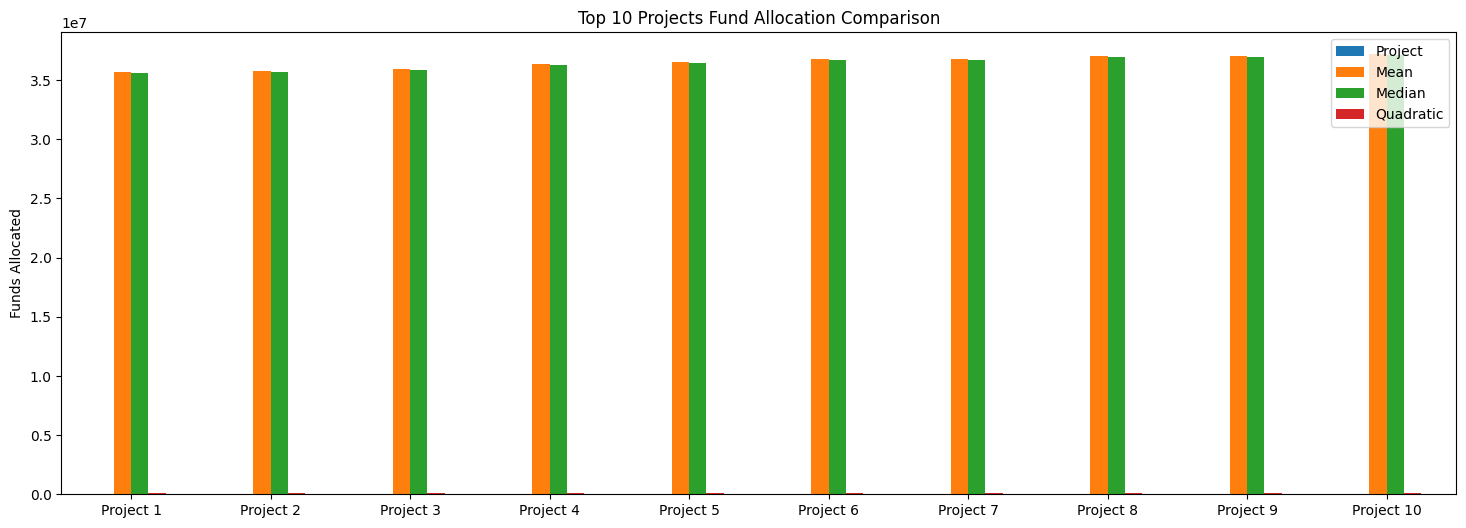

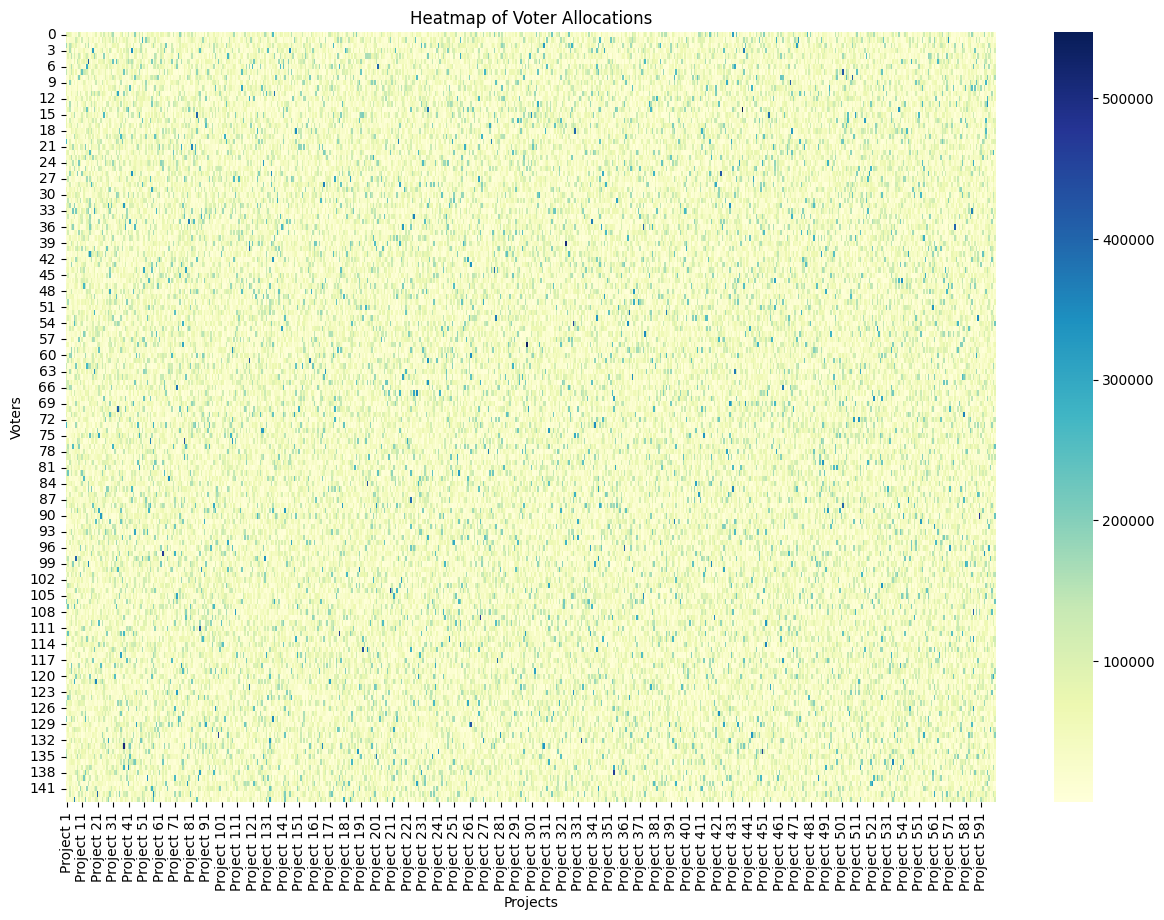

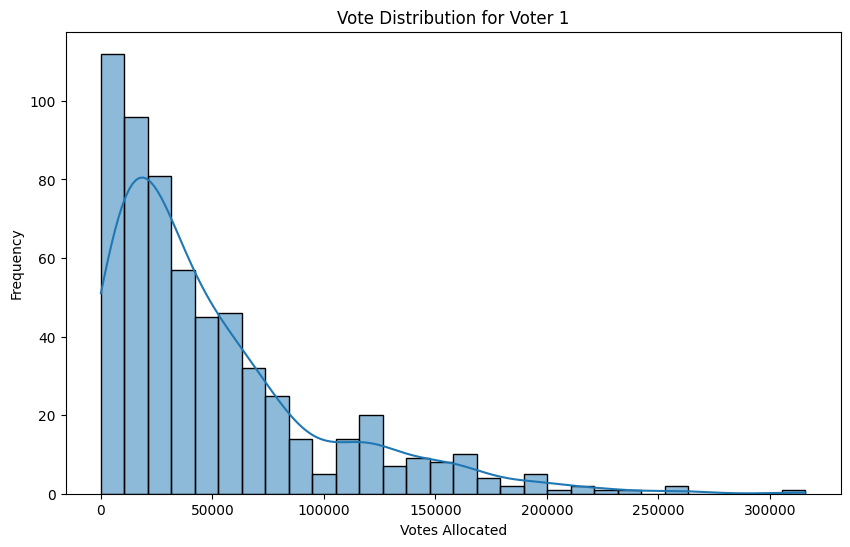

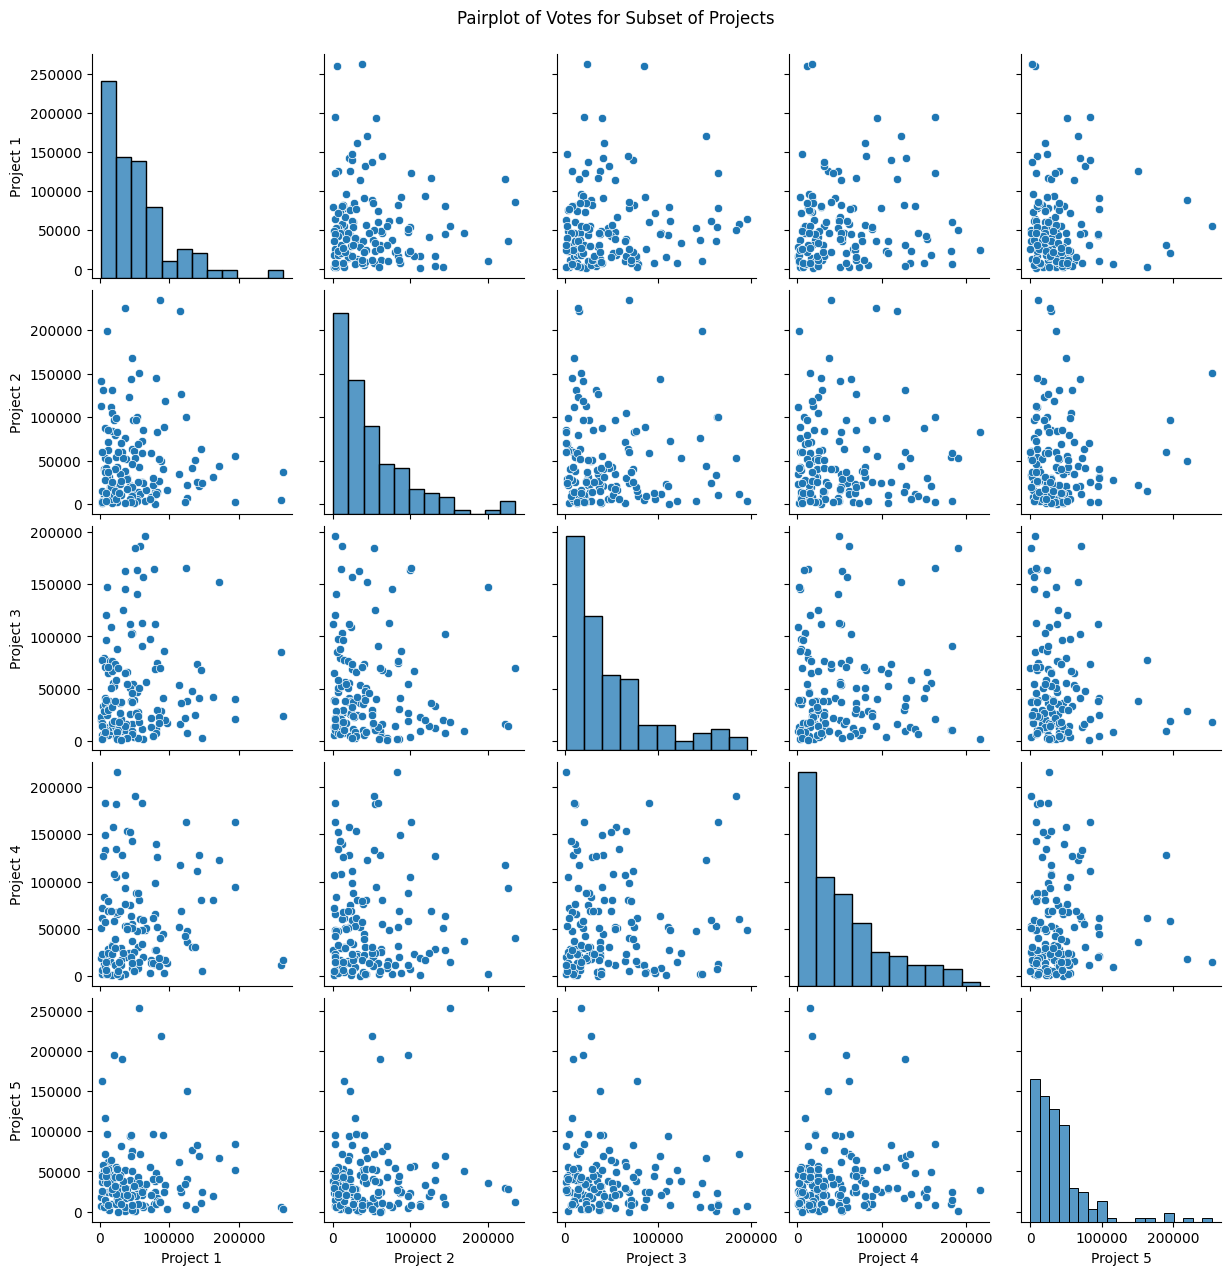

In [5]:
from mesa import Agent, Model
from mesa.time import RandomActivation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from util.voting_rules import mean_aggregation, median_aggregation,quadratic_aggregation
from agents.ProjectAgent import ProjectAgent
from agents.VoterAgent import VoterAgent



# Create the VotingModel class as defined previously
class VotingModel(Model):
    def __init__(self, num_voters, num_projects, total_op_tokens):
        self.num_voters = num_voters
        self.num_projects = num_projects
        self.total_op_tokens = total_op_tokens
        self.schedule = RandomActivation(self)

        self.voters = [VoterAgent(i, self, num_projects, total_op_tokens) for i in range(num_voters)]
        self.projects = [ProjectAgent(i, self) for i in range(num_projects)]

        for voter in self.voters:
            self.schedule.add(voter)
        for project in self.projects:
            self.schedule.add(project)

        self.voting_matrix = np.zeros((num_voters, num_projects))

    def step(self):
        for i, voter in enumerate(self.voters):
            voter.vote()
            self.voting_matrix[i, :] = voter.votes

    def aggregate_votes(self, method):
        if method == "mean":
            return mean_aggregation(self.voting_matrix)
        elif method == "median":
            return median_aggregation(self.voting_matrix)
        elif method == "quadratic":
            return quadratic_aggregation(self.voting_matrix)
        else:
            raise ValueError("Unknown aggregation method")

# Run the simulation
model = VotingModel(num_voters=144, num_projects=600, total_op_tokens=30e6)
model.step()

# Apply different aggregation methods
mean_results = model.aggregate_votes("mean")
median_results = model.aggregate_votes("median")
quadratic_results = model.aggregate_votes("quadratic")

# Allocate funds based on aggregated results
mean_funds = mean_results * model.total_op_tokens
median_funds = median_results * model.total_op_tokens
quadratic_funds = quadratic_results * model.total_op_tokens

# Calculate summary statistics for each aggregation method

# Total funds allocated
total_mean_funds = np.sum(mean_funds)
total_median_funds = np.sum(median_funds)
total_quadratic_funds = np.sum(quadratic_funds)

# Maximum funds allocated
max_mean_funds = np.max(mean_funds)
max_median_funds = np.max(median_funds)
max_quadratic_funds = np.max(quadratic_funds)

# Minimum funds allocated
min_mean_funds = np.min(mean_funds)
min_median_funds = np.min(median_funds)
min_quadratic_funds = np.min(quadratic_funds)

# Display the results
print("Summary Statistics:")
print(f"Mean Aggregation: Total Funds: {total_mean_funds}, Max Funds: {max_mean_funds}, Min Funds: {min_mean_funds}")
print(f"Median Aggregation: Total Funds: {total_median_funds}, Max Funds: {max_median_funds}, Min Funds: {min_median_funds}")
print(f"Quadratic Aggregation: Total Funds: {total_quadratic_funds}, Max Funds: {max_quadratic_funds}, Min Funds: {min_quadratic_funds}")


# Plot the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(mean_funds, bins=50)
plt.xlabel('Funds Allocated')
plt.ylabel('Number of Projects')
plt.title('Mean Aggregation')

plt.subplot(1, 3, 2)
plt.hist(median_funds, bins=50)
plt.xlabel('Funds Allocated')
plt.ylabel('Number of Projects')
plt.title('Median Aggregation')

plt.subplot(1, 3, 3)
plt.hist(quadratic_funds, bins=50)
plt.xlabel('Funds Allocated')
plt.ylabel('Number of Projects')
plt.title('Quadratic Aggregation')

plt.tight_layout()
plt.show()


import seaborn as sns

# Box Plot Visualization
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(mean_funds)
plt.xlabel('Funds Allocated')
plt.title('Mean Aggregation')

plt.subplot(1, 3, 2)
sns.boxplot(median_funds)
plt.xlabel('Funds Allocated')
plt.title('Median Aggregation')

plt.subplot(1, 3, 3)
sns.boxplot(quadratic_funds)
plt.xlabel('Funds Allocated')
plt.title('Quadratic Aggregation')

plt.tight_layout()
plt.show()

# Density Plot Visualization
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.kdeplot(mean_funds, fill=True)
plt.xlabel('Funds Allocated')
plt.title('Mean Aggregation')

plt.subplot(1, 3, 2)
sns.kdeplot(median_funds, fill=True)
plt.xlabel('Funds Allocated')
plt.title('Median Aggregation')

plt.subplot(1, 3, 3)
sns.kdeplot(quadratic_funds, fill=True)
plt.xlabel('Funds Allocated')
plt.title('Quadratic Aggregation')

plt.tight_layout()
plt.show()

# Comparison Bar Chart Visualization
# We will show the top 10 projects for each method
num_top_projects = 10
top_mean_projects = np.argsort(mean_funds)[-num_top_projects:]
top_median_projects = np.argsort(median_funds)[-num_top_projects:]
top_quadratic_projects = np.argsort(quadratic_funds)[-num_top_projects:]

# Create a DataFrame for visualization
top_projects_data = {
    "Project": range(num_top_projects),
    "Mean": mean_funds[top_mean_projects],
    "Median": median_funds[top_median_projects],
    "Quadratic": quadratic_funds[top_quadratic_projects]
}

df_top_projects = pd.DataFrame(top_projects_data)

df_top_projects.plot(kind="bar", figsize=(18, 6))
plt.xticks(range(num_top_projects), [f"Project {i+1}" for i in range(num_top_projects)], rotation=0)
plt.ylabel('Funds Allocated')
plt.title('Top 10 Projects Fund Allocation Comparison')
plt.show()


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convert the voting matrix to a DataFrame for visualization
voting_df = pd.DataFrame(model.voting_matrix, columns=[f'Project {i}' for i in range(1, model.num_projects + 1)])
voting_df['Voter'] = [f'Voter {i}' for i in range(1, model.num_voters + 1)]

# Heatmap Visualization
plt.figure(figsize=(15, 10))
sns.heatmap(voting_df.drop(columns=['Voter']), cmap="YlGnBu", cbar=True)
plt.xlabel('Projects')
plt.ylabel('Voters')
plt.title('Heatmap of Voter Allocations')
plt.show()

# Histogram Visualization (For a single voter)
voter_id = 0  # Change this to visualize different voters
plt.figure(figsize=(10, 6))
sns.histplot(voting_df.iloc[voter_id, :-1], bins=30, kde=True)
plt.xlabel('Votes Allocated')
plt.ylabel('Frequency')
plt.title(f'Vote Distribution for Voter {voter_id + 1}')
plt.show()

# Pairplot Visualization (For a subset of projects)
num_projects_subset = 5
subset_projects = voting_df.drop(columns=['Voter']).iloc[:, :num_projects_subset]
sns.pairplot(subset_projects)
plt.suptitle('Pairplot of Votes for Subset of Projects', y=1.02)
plt.show()
